In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
ROWS = 50
pd.set_option("display.max_rows",ROWS)

In [6]:
demographic_df = pd.read_csv("demographic.txt")
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


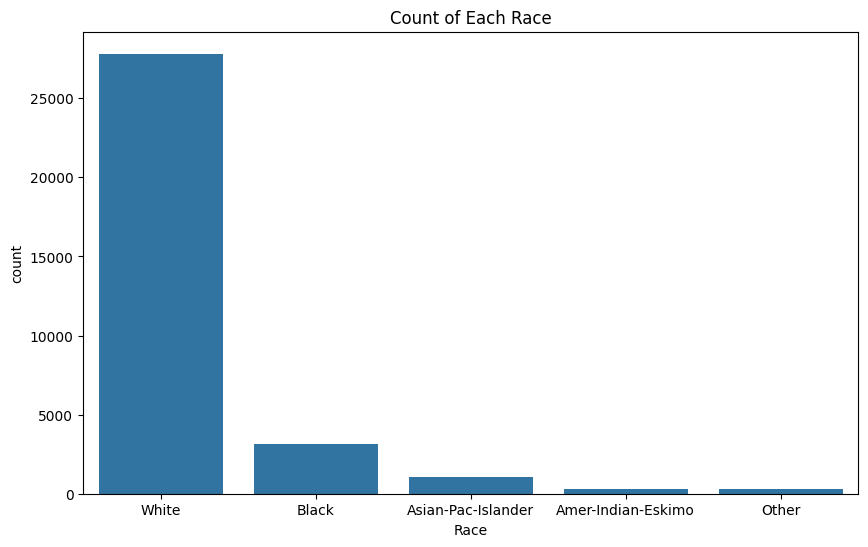

race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64


<Figure size 640x480 with 0 Axes>

In [26]:
# How many people of each race are represented in this dataset?

num_ppl = demographic_df["race"].value_counts()
plt.figure(figsize=(10,6))
sns.countplot(data=demographic_df,x="race",stat="count")
plt.title("Count of Each Race")
plt.xlabel("Race")
plt.show()
plt.clf()
print(num_ppl)


In [50]:
# Avg age of sex col.
avg_age_men = np.mean(demographic_df.loc[demographic_df["sex"]=="Male","age"])
avg_age_women = np.mean(demographic_df.loc[demographic_df["sex"]=="Female","age"])
print("The average age of males is: {}".format(avg_age_men))
print("The average age of females is: {}".format(avg_age_women))

print("\n")

# As a dataframe
avg_age = demographic_df.groupby("sex")["age"].mean().reset_index()
print(avg_age)

The average age of males is: 39.43354749885268
The average age of females is: 36.85823043357163


      sex        age
0  Female  36.858230
1    Male  39.433547


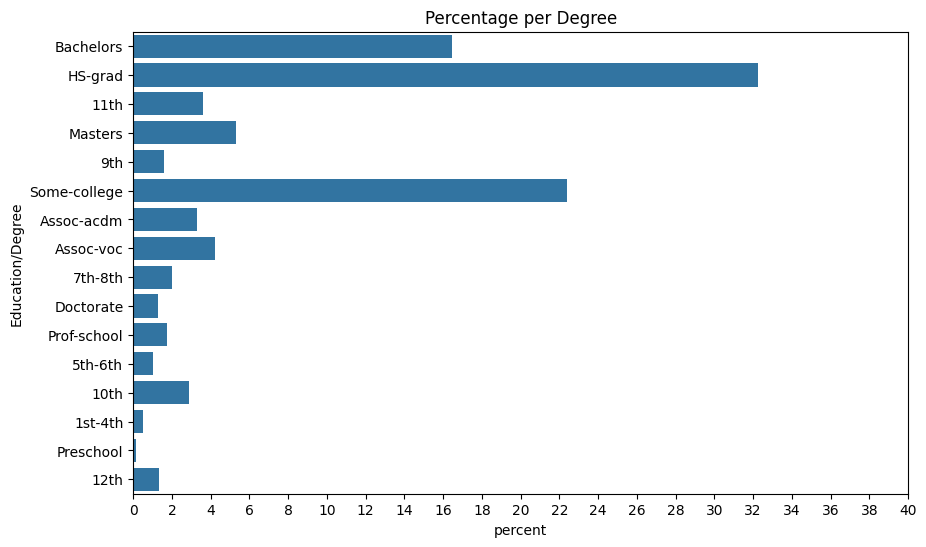

The percentage of people completed a bachelor's degree: 16.45


<Figure size 640x480 with 0 Axes>

In [72]:
# Percentage of people who have a Bachelor's degree
bachelor_degree = len(demographic_df.loc[demographic_df["education"]=="Bachelors"])/(demographic_df.shape[0])*100
plt.figure(figsize=(10,6))
sns.countplot(data=demographic_df,y="education",stat="percent")
plt.title("Percentage per Degree")
plt.ylabel("Education/Degree")
plt.xticks(np.arange(0,42,2))
plt.show()
plt.clf()

print("The percentage of people completed a bachelor's degree: {0:.2f}".format(bachelor_degree))

In [132]:
# Percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K
education_rows = demographic_df.query('education == ["Bachelors","Masters","Doctorate"] and salary == ">50K"')
filtered_rows = education_rows[["education","salary"]].value_counts().apply(lambda x: (x/len(demographic_df)*100))
print(round(filtered_rows,2))

education  salary
Bachelors  >50K      6.82
Masters    >50K      2.95
Doctorate  >50K      0.94
Name: count, dtype: float64


In [244]:
# Percentage of people without advanced education make more than 50K

education_rows = demographic_df.query('education != ["Bachelors","Masters","Doctorate"] and salary == ">50K"')
filtered_rows = education_rows[["education","salary"]].value_counts().apply(lambda x: (x/len(demographic_df)*100))
print(round(filtered_rows,2))

education     salary
HS-grad       >50K      5.14
Some-college  >50K      4.26
Prof-school   >50K      1.30
Assoc-voc     >50K      1.11
Assoc-acdm    >50K      0.81
10th          >50K      0.19
11th          >50K      0.18
7th-8th       >50K      0.12
12th          >50K      0.10
9th           >50K      0.08
5th-6th       >50K      0.05
1st-4th       >50K      0.02
Name: count, dtype: float64


In [245]:
# What country has the highest percentage of people that earn >50K and what is that percentage?

country_highest_perc = demographic_df.loc[demographic_df["salary"]==">50K","native-country"].replace("?","unknown").value_counts().reset_index()
max_percent = country_highest_perc["count"].apply(lambda x: x/len(demographic_df)*100)
record = country_highest_perc.to_dict(orient="records")[0]
record["count"] = max(max_percent)
print(record)






{'native-country': 'United-States', 'count': 22.023279383311323}


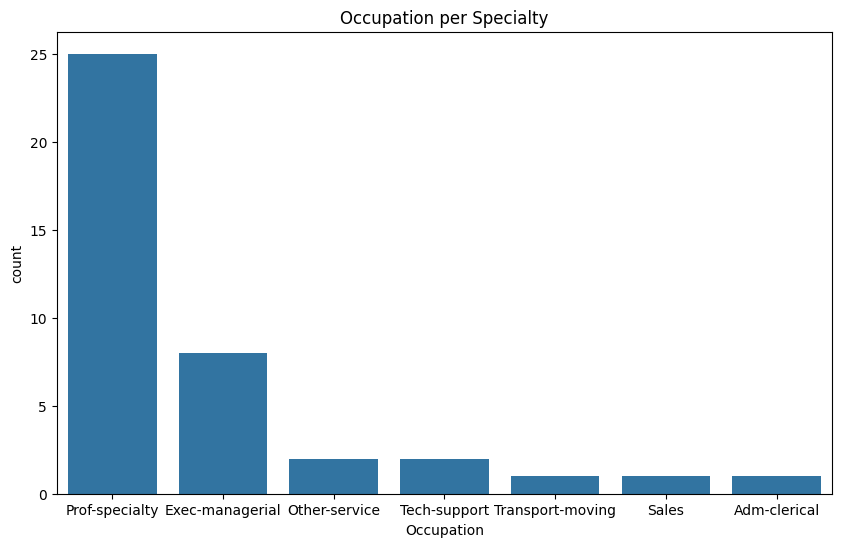

<Figure size 640x480 with 0 Axes>

In [ ]:
# Identify the most popular occupation for those who earn >50K in India.

rows = demographic_df.query('salary == ">50K" and `native-country` == "India"')

plt.figure(figsize=(10,6))
sns.countplot(data=rows,x="occupation",stat="count")
plt.title("Occupation per Specialty")
plt.xlabel("Occupation")
plt.show()
plt.clf()